In [47]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [48]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [49]:
# 신경망 구조
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512,activation = 'relu',input_shape=(28*28,)),
    layers.Dense(10,activation = 'softmax')
])

In [50]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [51]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

In [52]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [53]:
#모델 훈련
import tensorflow as tf
model.compile(optimizer='Adam',loss=tf.keras.losses.sparse_categorical_crossentropy ,metrics=['accuracy'])

In [54]:
model.fit(x_train,y_train,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2689 - accuracy: 0.9236
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1089 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0696 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0495 - accuracy: 0.9858
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0364 - accuracy: 0.9894


In [55]:
# 모델 예측
import numpy as np
x_test10 = x_test[:10]
predction = model.predict(x_test10)
np.argmax(predction[0])

1/1 [==============================] - 0s 45ms/step


7

In [56]:
y_test[0]

7

In [57]:
predction[0][7]

0.99857974

In [58]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0607 - accuracy: 0.9825


[0.06072613596916199, 0.9825000166893005]

In [65]:
# 평가 교차알고리즘 KFold
from sklearn.model_selection import KFold

In [67]:
accuracy = []
for tindex, vindex in  KFold().split(x_train):
    x_tr,x_val =  x_train[tindex],x_train[vindex]
    y_tr,y_val =  y_train[tindex],y_train[vindex]
    
    model = keras.Sequential([
        layers.Dense(512,activation = 'relu',input_shape=(28*28,)),
        layers.Dense(10,activation = 'softmax')
    ])
    model.compile(optimizer='Adam',loss=tf.keras.losses.sparse_categorical_crossentropy ,metrics=['accuracy'])
    model.fit(x_train,y_train,epochs=5,batch_size=128)
    accuracy.append( model.evaluate(x_test,y_test)[1])    

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2684 - accuracy: 0.9240
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1086 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0697 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0508 - accuracy: 0.9851
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0657 - accuracy: 0.9799
Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2669 - accuracy: 0.9256
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1093 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0708 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0491 - accuracy: 0.9858
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0707 - accuracy: 0.9781
Epoch 1/5


In [68]:
np.array(accuracy).mean()

0.9789000034332276

In [72]:
# 신경망에서 사용하는 데이터
# 스칼라(랭크-0 텐서)
x = np.array(12)
x.shape, x, x.ndim

((), array(12), 0)

In [74]:
# 벡터(랭크-1 텐서)
x = np.array([1,2,3,4])
x, x.shape, x.ndim

(array([1, 2, 3, 4]), (4,), 1)

In [79]:
# 행렬(랭크-2 텐서)
x = np.array([[1,2,3,4],[1,2,3,4]])
x, x.shape, x.ndim

(array([[1, 2, 3, 4],
        [1, 2, 3, 4]]),
 (2, 4),
 2)

In [80]:
# 랭크-3 텐서

In [81]:
x = np.array([[[1,2,3,4],[1,2,3,4]],[[1,2,3,4],[1,2,3,4]]])
x, x.shape, x.ndim

(array([[[1, 2, 3, 4],
         [1, 2, 3, 4]],
 
        [[1, 2, 3, 4],
         [1, 2, 3, 4]]]),
 (2, 2, 4),
 3)

In [82]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [83]:
x_train.ndim

3

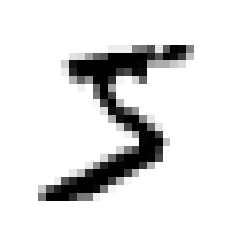

In [85]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='gray_r')
plt.axis('off')
plt.show()

In [87]:
y_train[0]

5

In [89]:
x_train.shape

(60000, 28, 28)

In [88]:
x_train10 = x_train[:10]
x_train10.shape

(10, 28, 28)

In [90]:
x_train10 = x_train[:10,:,:]
x_train10.shape

(10, 28, 28)

In [91]:
x_train10 = x_train[:10,:14,:14]
x_train10.shape

(10, 14, 14)

In [92]:
x_train10 = x_train[:10,:-10,:-10]
x_train10.shape

(10, 18, 18)

In [94]:
# 배치 개념
batch = x_train[:128]
batch.shape

(128, 28, 28)

In [95]:
batch = x_train[128:128*2]
batch.shape

(128, 28, 28)

In [ ]:
n = 3
batch = x_train[128*n:128*(n+1)]